Første steget importere alle nødvendige libraries
Viktigaste for detnne fasen er 
h5py for å åpne h5py filene, numpy for å transformere data til array
og matplotlib for å plotte data til en bilde

In [2]:
import sys
import numpy as np
from pathlib import Path

from fastai.vision.all import *

Sette opp path 2 parent bak so vi kan hente metoder fra dataloader og plotcreator filene

In [3]:
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

Legge til filene i variabelen fra deres respektive filene

In [4]:
data_path0 = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

Lage array fra data ved å utnytte metoden laget i dataloader

In [5]:
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

Lage datablocks frå data ved bruk av bidler som blokker og label som category returnerer datablock for videre bruk i vår vision learning metoden

In [6]:
def wrapper(image, lable):
    def pass_index(idx):
        return idx

    def get_x(i):
        return image[i]
    
    def get_y(i):
        return lable[i]

    db = DataBlock(
        blocks=(ImageBlock, CategoryBlock), 
        get_items = pass_index, 
        get_x = get_x, 
        get_y = get_y
    )

    num_images = image.shape[0]
    
    dls = db.dataloaders(list(range(num_images)),bs=64)
    

    return dls

In [7]:
#images
img = np.concatenate((bhArray, sphArray))

bhOnes = np.ones(len(bhArray))
sphZeros = np.zeros(len(sphArray))

#labels
label = np.concatenate((bhOnes, sphZeros))
imgNew = ((img - np.min(img)/(np.max(img)-np.min(img)))*255).astype(np.uint8)
dls = wrapper(imgNew, label)

In [8]:
# dls.show_batch(cmap='gray')

In [9]:
# standardPlot(imgNew[1])
# standardPlot(img[1])

Trene modellen vår

In [35]:
# Create your learner object
learner = vision_learner(dls, resnet18, metrics=accuracy)

In [49]:
learner.fine_tune(5)

For some reasons i cant get epochs to show

In [48]:
learner.validate()

(#2) [1.730026364326477,0.6791666746139526]

In [45]:
learner.fit_one_cycle(8)

In [46]:
learner.validate()

(#2) [1.730026364326477,0.6791666746139526]

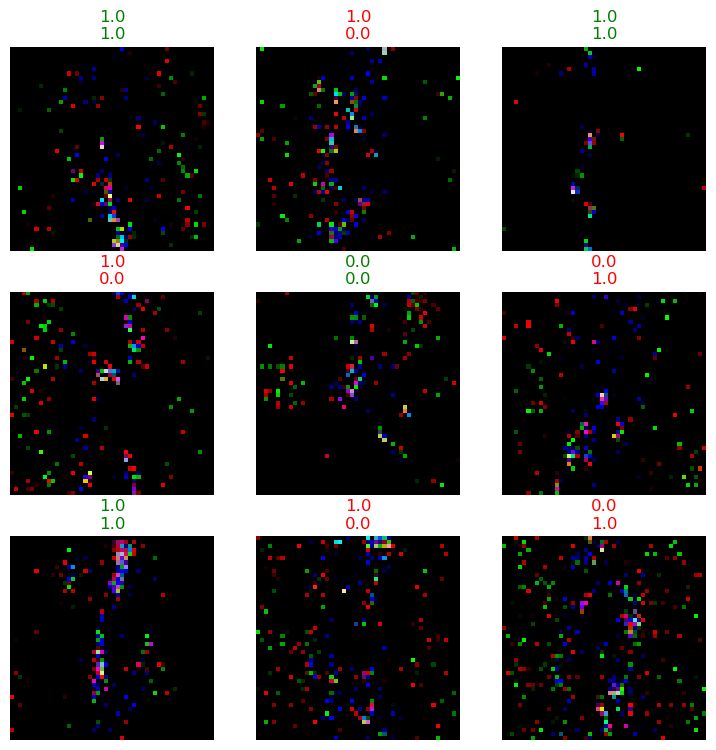

In [47]:
learner.show_results()